## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [2]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]

C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
abr_cut = 0.05
data2['external_share'] = data2.external_share.replace(np.nan, -1)
level = np.rint(np.size(data2['tot_cit_correct'].dropna())
                                                   - abr_cut * np.size(data2['tot_cit_correct'].
                                                                   dropna()))
cutoff = np.sort(data2['tot_cit_correct'].dropna())[int(level)]
cutoff

19.565999999999999

In [4]:
#This function will be used to determine whether a patent is abrupt or incremental.
#A patent at the top 10% of expected citations is set to be aprupt

def abrupt(cites, cutoff):
    #The cutoff value that defines an abrupt innovation can be adjusted
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt, cutoff = cutoff)
data2['tot_abr_inc_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_correct']
data2['tot_abr_class_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_class_correct']

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces
#those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)
print(np.mean(data2['Increment']))

0.9499870501239488


In [5]:
print(np.size(data2[data2.External == 1]))
print(np.size(data2[data2.External == 0]))

8709180
29129020


<IPython.core.display.Javascript object>


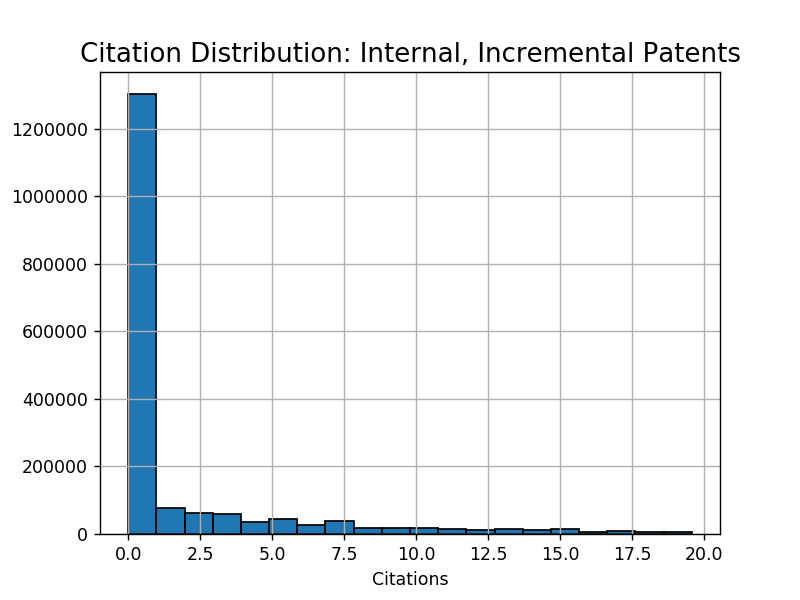

Total, mean, standard deviation: 1797290 , 1.7456033128032384 , 3.757561805968668


<IPython.core.display.Javascript object>


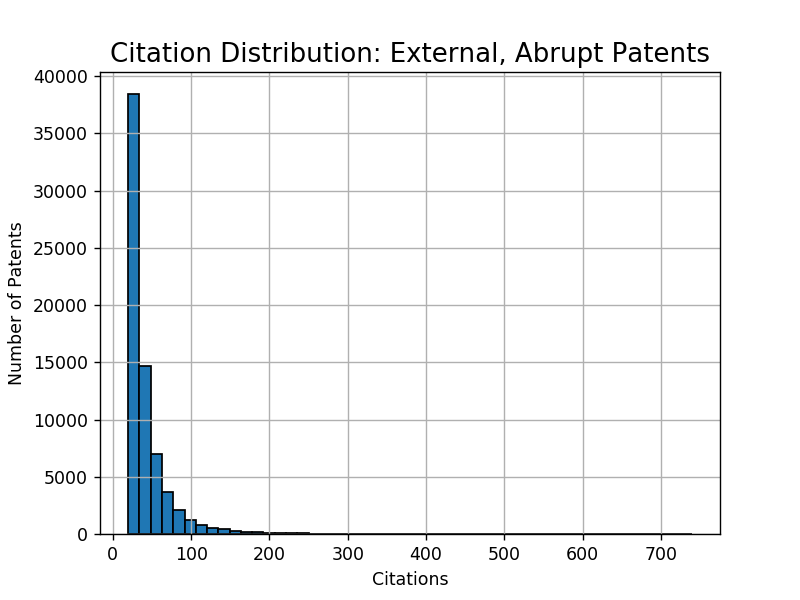

Total, mean, standard deviation: 69935 , 42.179932460141764 , 33.05437289153946


<IPython.core.display.Javascript object>


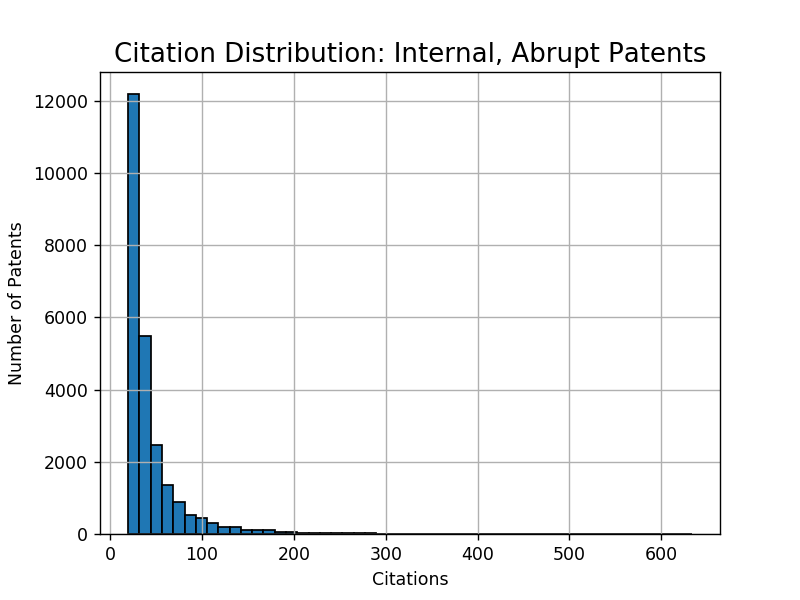

Total, mean, standard deviation: 24685 , 43.700427024507796 , 35.35010670335158


<IPython.core.display.Javascript object>


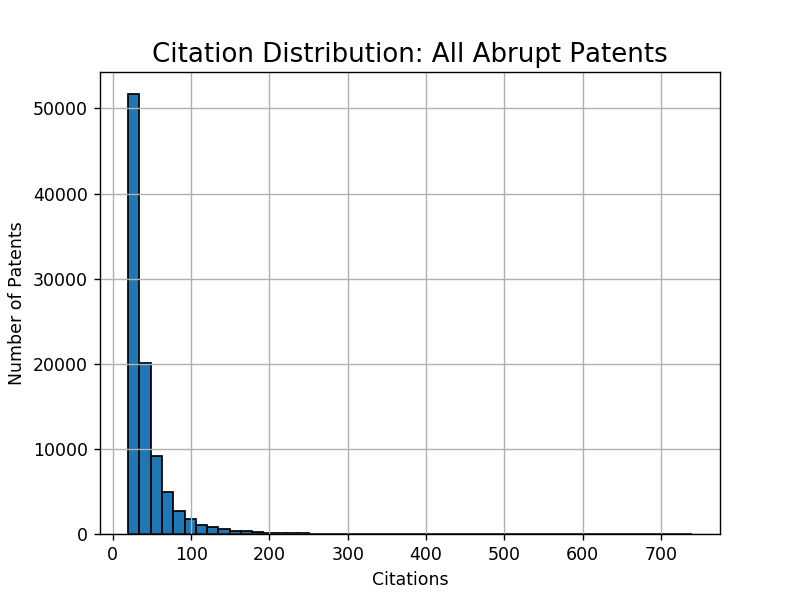

Total, mean, standard deviation: 94620 , 42.57660766962754 , 33.67501214935397


<IPython.core.display.Javascript object>


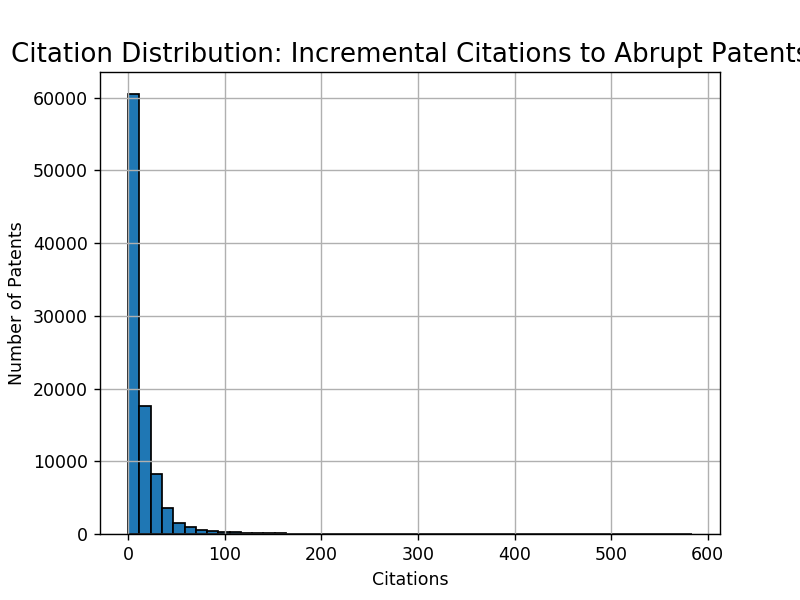

Total, mean, standard deviation: 94620 , 13.162169455717494 , 21.657893199510813


<IPython.core.display.Javascript object>


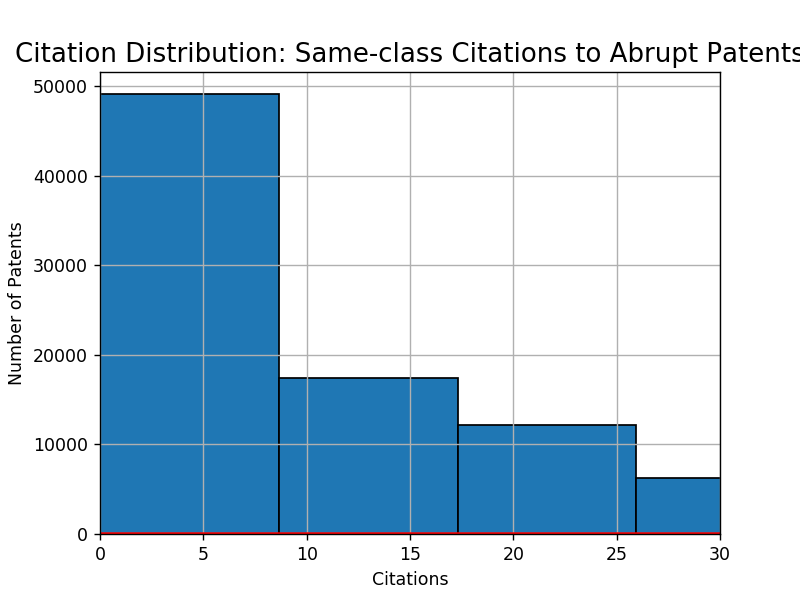

Total, mean, standard deviation: 94620 , 15.159265221940744 , 24.511104284530234
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 365524 , 6.348982453378945 , 4.692371065729656


In [6]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct', bins = 20, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total abrupt innovation
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: All Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total incremental citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_inc_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Incremental Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_abr_inc_cit_correct),',',
      np.std(data3.tot_abr_inc_cit_correct))

#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(
    data3.tot_abr_class_cit_correct),',', np.std(data3.tot_abr_class_cit_correct))

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

## Testing how varying the Parameters affects the distribution (can be used to choose moments)

In [7]:
def pdf_eta2(lambda_inc_0, alpha, tau_lambda_int_abr, ndim):
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    eta_k_mod = [None] * ndim
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_0 * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))**i
    
    return eta_k_mod
ndim = 750
np.sum(pdf_eta2(.12, .99, 9.39, ndim))

dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta2(5.5, .6, .2, 750),
         linewidth=2, color='r')
plt.xlim([0, 30])

(0, 30)

## Estimation

In [8]:
def pdf_eta(lambda_inc_k, tau_lambda_int_abr):
    
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    eta_k_mod = [None] * len(lambda_inc_k)
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_0 * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))**i
    
    return eta_k_mod

In [9]:
def model_moments(lambda_inc_k, tau_lambda_int_abr):
    
    eta_k_mod = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
#    lambda_inc_mod = np.dot(eta_k_mod, lambda_inc_k)
    eta_k_mean_mod = np.dot(eta_k_mod, np.arange(len(lambda_inc_k)))
    eta_k_var_mod = np.dot(np.multiply(np.arange(len(lambda_inc_k)) - eta_k_mean_mod,
                                     np.arange(len(lambda_inc_k)) - eta_k_mean_mod), eta_k_mod)
    bpct_4_mod = np.dot(eta_k_mod[0:20], np.linspace(0, 19, 20))
#    eta_k_ske_mod = np.dot(np.multiply(np.multiply(((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod),
#                                    ((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod)),
#                                     ((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod))
#                         , eta_k_mod)
    bpct_5_mod = np.dot(eta_k_mod[20:40], np.linspace(20, 39, 20))
    
    return eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod

def data_moments(xvals):
    
    unique, counts = np.unique(xvals, return_counts=True)
    eta_k_data = counts / np.size(np.array(xvals))
#    seq = np.linspace(0, 15490, 15491)
#    lambda_inc_k_data = np.array(0.8 * 0.95**seq)
#    lambda_inc_data = np.dot(eta_k_data, lambda_inc_k_data)
    bpct_4_data = np.dot(eta_k_data[0:20], np.linspace(0, 19, 20))
    bpct_5_data = np.dot(eta_k_data[20:40], np.linspace(20, 39, 20))
    
    return np.mean(xvals), np.var(xvals), bpct_4_data, bpct_5_data

def err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple):
    
    eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(
        lambda_inc_k, tau_lambda_int_abr)
    moms_mod = np.array([[eta_k_mean_mod], [eta_k_var_mod], [bpct_4_mod], [bpct_5_mod]])
    eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(xvals)
    moms_data = np.array([[eta_k_mean_data], [eta_k_var_data], [bpct_4_data], [bpct_5_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_abr_distr(params, *args):
    
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [12]:
cit_abr = data2[(data2.Increment == 0)]
abr_dist_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna().value_counts()) / np.size(
    np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
np.size(abr_dist_data)
np.max(cit_abr.tot_cit_correct)

739.26779999999997

In [13]:
tau_lambda_int_abr_init = 0.5
lambda_inc_0_init = 2
alpha_init = 0.95
W_hat = np.eye(4)
#W_hat = np.diag((1000000,100,1))
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(0.5, 1-1e-5))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
gmm_args = (np.array(cit_abr.tot_abr_class_cit_correct.dropna()), W_hat, ndim)
results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM = results_abr_distr.x
print('tau_lambda_int_abr_GMM=', tau_lambda_int_abr_GMM, 'lambda_inc_0_GMM=', lambda_inc_0_GMM,
      'alpha_GMM=', alpha_GMM)

tau_lambda_int_abr_GMM= 9.40116702833 lambda_inc_0_GMM= 0.10114943787 alpha_GMM= 0.99082707071


In [14]:
results_abr_distr

      fun: array([[ 2.99854578]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -4.44089210e-08,   8.88178420e-08,  -1.59872116e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 68
      nit: 16
   status: 0
  success: True
        x: array([ 9.40116703,  0.10114944,  0.99082707])

In [15]:
seq = np.arange(ndim)
lambda_inc_k_GMM = np.array(lambda_inc_0_GMM * alpha_GMM**seq)
eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(lambda_inc_k_GMM,
                                                              tau_lambda_int_abr_GMM)

err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False).reshape(4,)
print('eta_k_mean_mod = ', eta_k_mean_mod, 'eta_k_var_mod = ', eta_k_var_mod,
      'bpct_4_mod = ', bpct_4_mod, 'bpct_5_mod = ', bpct_5_mod)
print('eta_k_mean_data = ', eta_k_mean_data, 'eta_k_var_data = ', eta_k_var_data,
      'bpct_4_data = ', bpct_4_data, 'bpct_5_data = ', bpct_5_data)
print('Error vector=', err1)

eta_k_mean_mod =  0.0107560673426 eta_k_var_mod =  0.0108674925913 bpct_4_mod =  0.0107560673426 bpct_5_mod =  2.17374437542e-40
eta_k_mean_data =  15.1592652219 eta_k_var_data =  600.794233247 bpct_4_data =  0.0107482561826 bpct_5_data =  0.0476220672162
Error vector= [ -9.99290462e-01  -9.99981911e-01   7.26737418e-04  -1.00000000e+00]


In [16]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM))
lambda_inc_GMM = np.dot(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM), lambda_inc_k_GMM)
print(sum_eta, lambda_inc_GMM, tau_lambda_int_abr_GMM)

0.999998959473 0.101139353714 9.40116702833


<IPython.core.display.Javascript object>


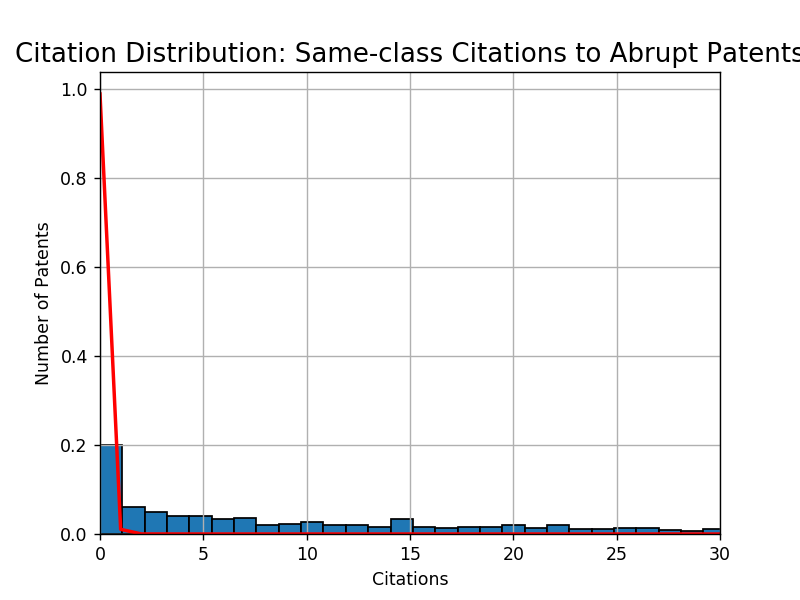

(0, 30)

In [17]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM),
         linewidth=2, color='r')
plt.xlim([0, 30])

In [18]:
err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False)
VCV2 = np.dot(err1, err1.T) / np.size(np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
print(VCV2)
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)

[[  1.05535978e-05   1.05609003e-05  -7.67514025e-09   1.05610913e-05]
 [  1.05609003e-05   1.05682078e-05  -7.68045098e-09   1.05683990e-05]
 [ -7.67514025e-09  -7.68045098e-09   5.58177208e-12  -7.68058991e-09]
 [  1.05610913e-05   1.05683990e-05  -7.68058991e-09   1.05685902e-05]]
[[  1.05086048e+04   1.05158762e+04  -7.64241892e+00   1.05160664e+04]
 [  1.05158762e+04   1.05231525e+04  -7.64770702e+00   1.05233429e+04]
 [ -7.64241892e+00  -7.64770702e+00   5.55797538e-03  -7.64784535e+00]
 [  1.05160664e+04   1.05233429e+04  -7.64784535e+00   1.05235332e+04]]


In [44]:
params_init = np.array([tau_lambda_int_abr_GMM - 9.32, lambda_inc_0_GMM, alpha_GMM])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
gmm_args = (np.array(cit_abr.tot_abr_class_cit_correct.dropna()), W_hat2, ndim)
results2_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
tau_lambda_int_abr_GMM2, lambda_inc_0_GMM2, alpha_GMM2 = results2_abr_distr.x
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2, 'lambda_inc_0_GMM2=', lambda_inc_0_GMM2,
      'alpha_GMM2=', alpha_GMM2)

tau_lambda_int_abr_GMM2= 0.0811638417269 lambda_inc_0_GMM2= 0.345899348971 alpha_GMM2= 0.990827430144


In [45]:
results2_abr_distr

      fun: array([[  4.00549416e-10]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.46302467e+00,  -3.20139245e-03,   8.52678568e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 232
      nit: 5
   status: 0
  success: True
        x: array([ 0.08116384,  0.34589935,  0.99082743])

In [46]:
seq = np.arange(ndim)
lambda_inc_k_GMM2 = np.array(lambda_inc_0_GMM2 * alpha_GMM2**seq)
eta_k_mean_data2, eta_k_var_data2, bpct_4_data2, bpct_5_data2 = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2, eta_k_var_mod2, bpct_4_mod2, bpct_5_mod2 = model_moments(lambda_inc_k_GMM2,
                                                                 tau_lambda_int_abr_GMM2)

err2 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2, False).reshape(4,)
print('eta_k_mean_mod2 = ', eta_k_mean_mod2, 'eta_k_var_mod2 = ', eta_k_var_mod2,
      'bpct_4_mod2 = ', bpct_4_mod2, 'bpct_5_mod2 = ', bpct_5_mod2)
print('eta_k_mean_data2 = ', eta_k_mean_data2, 'eta_k_var_data2 = ', eta_k_var_data2,
      'bpct_4_data2 = ', bpct_4_data2, 'bpct_5_data2 = ', bpct_5_data2)
print('Error vector=', err2)

eta_k_mean_mod2 =  3.75271650547 eta_k_var_mod2 =  16.2053116811 bpct_4_mod2 =  3.61105579158 bpct_5_mod2 =  0.141359216123
eta_k_mean_data2 =  15.1592652219 eta_k_var_data2 =  600.794233247 bpct_4_data2 =  0.0107482561826 bpct_5_data2 =  0.0476220672162
Error vector= [  -0.75244733   -0.97302685  334.96666568    1.96835531]


<IPython.core.display.Javascript object>


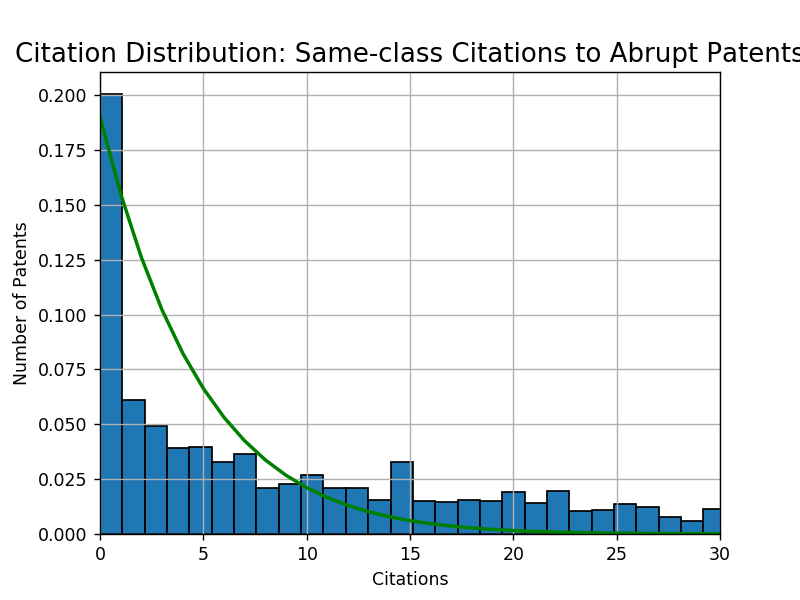

In [47]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2),
         linewidth=2, color='g')

In [24]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2))
lambda_inc_GMM2 = np.dot(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2), lambda_inc_k_GMM2)
print(sum_eta, lambda_inc_GMM2, tau_lambda_int_abr_GMM2)

0.97252261902 0.404859713995 0.101151458797


In [25]:
def log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr):
    lik_array = np.zeros(len(xvals))
    pmf = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    rounded = np.round(xvals)
    for n in range(0, len(xvals)):
        lik_array[n] = pmf[np.int(rounded[n])]
    
    lik_array[lik_array < 1e-20] = 1e-20
    loglik_array = np.log(lik_array)
    
    return np.sum(loglik_array)

def crit_log_lik(params, *args):
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    loglik = log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr)
    crit_val = -loglik
    print(params, crit_val)
    
    return crit_val

In [26]:
tau_lambda_int_abr_init = 0.6
lambda_inc_0_init = 0.5
alpha_init = 0.6
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
W = np.eye(3)
MLE_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (MLE_data, W, ndim)
results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_MLE, lambda_inc_0_MLE, alpha_MLE = results_MLE.x
print('tau_lambda_int_abr_MLE=', tau_lambda_int_abr_MLE, 'lambda_inc_0_MLE=', lambda_inc_0_MLE,
      'alpha_MLE=', alpha_MLE)

[ 0.6  0.5  0.6] 2419688.8894
[ 0.60000001  0.5         0.6       ] 2419688.89119
[ 0.6         0.50000001  0.6       ] 2419688.88724
[ 0.6         0.5         0.60000001] 2419688.87862
[ 0.59999722  1.5         0.60000186] 2295397.66304
[ 0.59999723  1.5         0.60000186] 2295397.66478
[ 0.59999722  1.50000001  0.60000186] 2295397.66234
[ 0.59999722  1.5         0.60000187] 2295397.64941
[ 0.35688289  2.75359407  0.99999   ] 379272.41404
[ 0.3568829   2.75359407  0.99999   ] 379272.416241
[ 0.35688289  2.75359408  0.99999   ] 379272.413755
[ 0.35688289  2.75359407  0.99999001] 379272.347638
[ 0.0467464   2.93801523  0.99999   ] 415919.660321
[ 0.04674641  2.93801523  0.99999   ] 415919.645203
[ 0.0467464   2.93801524  0.99999   ] 415919.660562
[ 0.0467464   2.93801523  0.99999001] 415919.662328
[ 0.2163231   2.83717727  0.99999   ] 355864.552782
[ 0.21632311  2.83717727  0.99999   ] 355864.553415
[ 0.2163231   2.83717728  0.99999   ] 355864.552734
[ 0.2163231   2.83717727  0.9999900

In [27]:
print(results_MLE)
print(crit_log_lik((tau_lambda_int_abr_MLE, lambda_inc_0_MLE, 1.0), MLE_data, W, ndim))

      fun: 354893.75753914623
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.91038305e-02,   5.82076609e-03,  -3.43773965e+06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 7
   status: 0
  success: True
        x: array([ 0.18731846,  2.83951984,  0.99999   ])
(0.18731846136832547, 2.8395198401988981, 1.0) 354859.412387
354859.412387


<IPython.core.display.Javascript object>


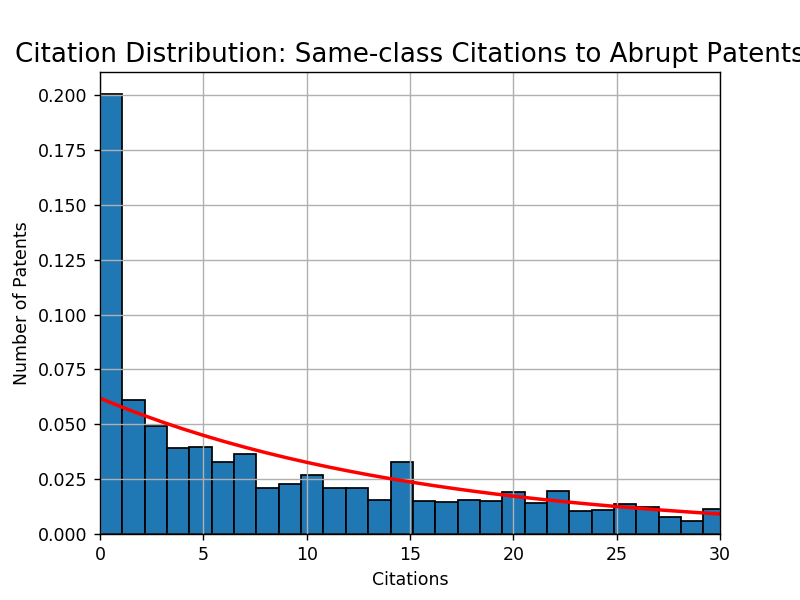

In [28]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta2(lambda_inc_0_MLE, alpha_MLE, tau_lambda_int_abr_MLE, ndim),
         linewidth=2, color='r')

In [29]:
seq = np.arange(ndim)
lambda_inc_k_MLE = np.array(lambda_inc_0_MLE * alpha_MLE**seq)
sum_eta = np.sum(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE))
lambda_inc_MLE = np.dot(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE), lambda_inc_k_MLE)
print(sum_eta, lambda_inc_MLE, tau_lambda_int_abr_MLE)

0.999857880874 2.83868617532 0.187318461368


### Robustness

In [37]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod = lambda_inc_GMM / (lambda_inc_GMM + tau_lambda_int_abr_GMM)

print('share_inc_data = ', share_inc_data, 'share_inc_mod = ', share_inc_mod)

#RD intensity
RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k_GMM,
                                                                   tau_lambda_int_abr_GMM),
                                             np.multiply(lambda_inc_k_GMM, lambda_inc_k_GMM)
                                            ) / 0.075547

RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod = ', RD_intens_mod)

share_inc_data =  0.9499870501239488 share_inc_mod =  0.010643663722
RD_intens_data =  0.06797109 RD_intens_mod =  0.466567832801


In [48]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod2 = lambda_inc_GMM2 / (lambda_inc_GMM2 + tau_lambda_int_abr_GMM2)

print('share_inc_data = ', share_inc_data, 'share_inc_mod2 = ', share_inc_mod2)

#RD intensity
RD_intens_mod2 = 0.106 * 0.346 * (1 / (share_inc_mod2)) * np.dot(pdf_eta(lambda_inc_k_GMM2,
                                                                   tau_lambda_int_abr_GMM2),
                                             np.multiply(lambda_inc_k_GMM2, lambda_inc_k_GMM2)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod2 = ', RD_intens_mod2)

share_inc_data =  0.9499870501239488 share_inc_mod2 =  0.83300430448
RD_intens_data =  0.06797109 RD_intens_mod2 =  0.0633296410051


In [39]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod3 = lambda_inc_MLE / (lambda_inc_MLE + tau_lambda_int_abr_MLE)

print('share_inc_data = ', share_inc_data, 'share_inc_mod3 = ', share_inc_mod3)

#RD intensity
RD_intens_mod3 = 0.106 * 0.346 * (1 / (share_inc_mod3)) * np.dot(pdf_eta(lambda_inc_k_MLE,
                                                                   tau_lambda_int_abr_MLE),
                                             np.multiply(lambda_inc_k_MLE, lambda_inc_k_MLE)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod3 = ', RD_intens_mod3)

share_inc_data =  0.9499870501239488 share_inc_mod3 =  0.938097100349
RD_intens_data =  0.06797109 RD_intens_mod3 =  4.17074319102


## Entry Rate Calculations

In [5]:
Patent_evol = pd.read_csv('evol_pat_year_count_df.csv', sep = ',', header = 0, index_col = 0)
Innov_emp = pd.read_csv('Innov_emp.csv', sep = ',', header = 0, index_col = 0)
#Entry rate per 5 years (by employment)
entry_rate1976 = Patent_evol.emp[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1981 = Patent_evol.emp[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1986 = Patent_evol.emp[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1991 = Patent_evol.emp[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1996 = Patent_evol.emp[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate2001= Patent_evol.emp[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)

Entry rates: 
1976 - 1980 =  0.0021245205023886736 
1981 - 1985 =  0.0023513519177680454 
1986 - 1990 =  0.002191138646583526 
1991 - 1995 =  0.001965464743272693 
1996 - 2000 =  0.0044289127179007156 
2001 - 2005 =  0.0018598440948136667


In [6]:
#Entry rate per 5 years (by nb firms)
entry_rate1976 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1976) & 
                                                          (Innov_emp.fyear < 1981)].sum()
entry_rate1981 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1981) & 
                                                          (Innov_emp.fyear < 1986)].sum()
entry_rate1986 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1986) & 
                                                          (Innov_emp.fyear < 1991)].sum()
entry_rate1991 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1991) & 
                                                          (Innov_emp.fyear < 1996)].sum()
entry_rate1996 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1996) & 
                                                          (Innov_emp.fyear < 2001)].sum()
entry_rate2001 = Patent_evol.firstYear[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 2001) & 
                                                          (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)
entry_rate = np.mean(np.array([entry_rate1976, entry_rate1981, entry_rate1986, entry_rate1991
                             , entry_rate1996, entry_rate2001]))
print('Mean entry rate = ', entry_rate)
lambda_e = entry_rate

Entry rates: 
1976 - 1980 =  0.0704656355967 
1981 - 1985 =  0.0591484464902 
1986 - 1990 =  0.0625711845103 
1991 - 1995 =  0.067709919016 
1996 - 2000 =  0.0710200455328 
2001 - 2005 =  0.0266078444889
Mean entry rate =  0.0595871792725
